<a href="https://colab.research.google.com/github/Cvelsen22/Carmelo-Velez---Data-Analysis-Portfolio/blob/main/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satellite Image Classification
This is a collection of satellite images labeled with classes such as "Cloudy", "Desert", "Green_Area", and "Water". The data comes from images of size 256x256, and was used for computer vision image classification.

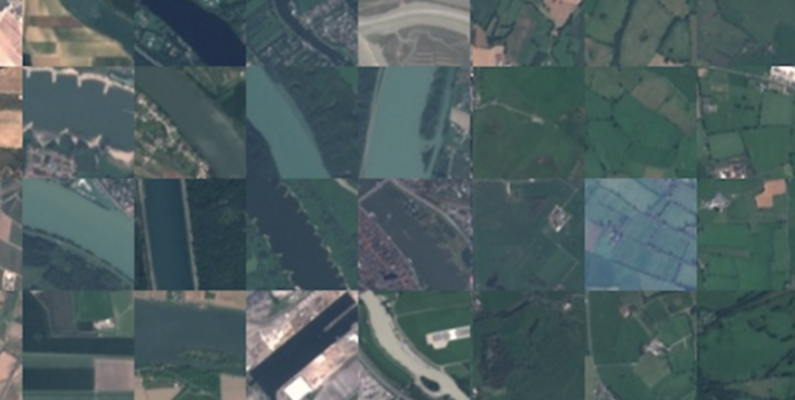



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your dataset
data_dir = r'C:\Users\Usuario\personal_projects\machineLearning_projects\supervised_learning\image_classification\image_satellite_classification\data'

# Create data generator
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # set the validation split
)

# Create data generators for training and validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # adjust the target size according to your model
    batch_size=32,
    class_mode='categorical',  # use 'categorical' for multi-class classification
    subset='training'  # specify training subset
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # specify validation subset
)


Found 4505 images belonging to 1 classes.
Found 1126 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Dropout(0.25)) # Add a dropout layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10


140/140 [==============================] - 230s 2s/step - loss: 1413079.1250 - accuracy: 0.2739 - val_loss: 10184003.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
140/140 [==============================] - 184s 1s/step - loss: 117737120.0000 - accuracy: 0.2499 - val_loss: 156167792.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
140/140 [==============================] - 177s 1s/step - loss: 846393792.0000 - accuracy: 0.2417 - val_loss: 806168896.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
140/140 [==============================] - 185s 1s/step - loss: 3507030528.0000 - accuracy: 0.2504 - val_loss: 2377186304.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
140/140 [==============================] - 173s 1s/step - loss: 8323272192.0000 - accuracy: 0.2560 - val_loss: 6715061248.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
140/140 [==============================] - 171s 1s/step - loss: 19048028160.0000 - accuracy: 0.2504 - val_loss: 35701248000.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
140/

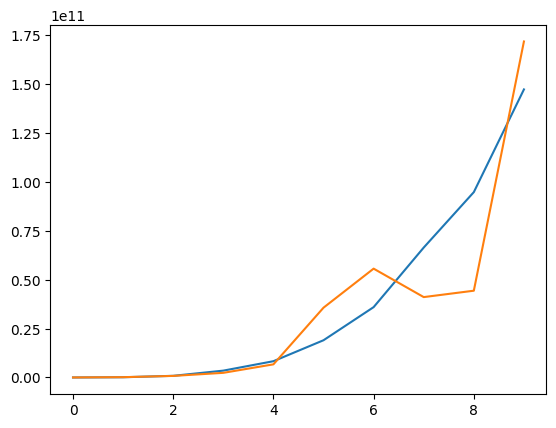

In [ ]:
import matplotlib.pyplot as plt

# Extract the history from the training object
training_history = history.history

# Plot the training loss
plt.plot(training_history['loss'])
# Plot the validation loss
plt.plot(training_history['val_loss'])

# Show the figure
plt.show()

In [ ]:
# Print the model's weights
print(model.get_weights())

[array([[[[ 3.87448132e-01,  3.85182470e-01, -1.13570943e-01,
           2.74916857e-01,  3.84842664e-01,  3.38876158e-01,
          -2.54550934e-01,  4.76586640e-01,  4.63808328e-01,
           2.21093222e-01,  4.82206374e-01, -1.79078355e-02,
           3.17223579e-01,  3.34373921e-01,  4.80843127e-01,
           3.26396078e-01,  5.06183863e-01,  3.67449194e-01,
          -1.23882003e-01,  1.30495680e-02,  4.31939811e-01,
           2.40187645e-01,  5.00124753e-01, -1.33145154e-01,
           3.84917349e-01,  3.26831877e-01,  2.98220694e-01,
           4.40279275e-01, -4.14691232e-02,  3.34610760e-01,
           3.20736885e-01,  3.00271511e-01],
         [-1.70456365e-01, -4.89706695e-01, -8.67434219e-02,
          -3.02852958e-01, -2.56712079e-01, -3.40841860e-01,
           2.32320547e-01, -4.41644311e-01, -2.48919547e-01,
          -3.14653337e-01, -4.14282709e-01, -1.22492179e-01,
          -4.64986056e-01, -4.02658105e-01, -4.24086094e-01,
          -2.58293211e-01, -2.84036547e

In [ ]:
test_dir = r'C:\Users\Usuario\personal_projects\machineLearning_projects\supervised_learning\image_classification\image_satellite_classification\data\test_data'

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values between 0 and 1

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # or 'binary' if it's a binary classification
)

# Evaluate the model
evaluation = model.evaluate(test_generator)

# Print the evaluation results
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")


Found 14420 images belonging to 4 classes.
451/451 [==============================] - 223s 494ms/step - loss: 50191966208.0000 - accuracy: 0.3606
Test Loss: 50191966208.0
Test Accuracy: 0.3606102764606476


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get the predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Print the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


451/451 [==============================] - 103s 226ms/step
Classification Report:
              precision    recall  f1-score   support

     Dessert       0.36      1.00      0.53      5200
      cloudy       0.00      0.00      0.00        20
  green_area       0.00      0.00      0.00      5200
       water       0.00      0.00      0.00      4000

    accuracy                           0.36     14420
   macro avg       0.09      0.25      0.13     14420
weighted avg       0.13      0.36      0.19     14420



c:\Users\Usuario\my_venvs\basic_env\basic_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\my_venvs\basic_env\basic_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\my_venvs\basic_env\basic_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r